<a href="https://colab.research.google.com/github/davidkim5929/Python-AI/blob/main/Python_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/taxi.csv')

In [3]:
#Removing unwanted Data. 
#Removing all the NaN (not a number) with inplace = True.
df.dropna(inplace = True)
#Searching for data where df['distance'] == 0
df.loc[df['distance'] == 0]
#Removing all of the rows (axis = 0) where df['distance'] == 0 by their index with inplace = True
df.drop(df.loc[df['distance'] == 0].index, axis = 0, inplace = True)

In [ ]:
#dfc = clone of df
dfc = df
dfc['color'] = dfc['color'].str.upper()
dfc['distance (mi)'] = dfc['distance'].astype('str').str.split('.').str[0].astype('int')
dfc.drop(dfc.loc[dfc['distance (mi)'] == 0].index, axis = 0, inplace = True)
df2_df = dfc.groupby(['color', 'distance (mi)']).mean()[['total']]
df2_df.reset_index()
print(df2_df)

In [ ]:
#Cropping columns from DataFrame(raw data)
df2 = df[['color','total', 'distance']]
#Converting distance from float to int to better presentation of data.
df2['distance (mi)'] = df2['distance'].astype('str').str.split('.').str[0].astype('int')
#Converting taxi color from lowercase to uppercase
df2['color'] = df2['color'].str.upper()
#Using the drop function to remove distance == 0 (actually means less than a mile due to conversion of float to int)
df2.drop(df2.loc[df2['distance (mi)'] == 0].index, axis = 0, inplace = True)

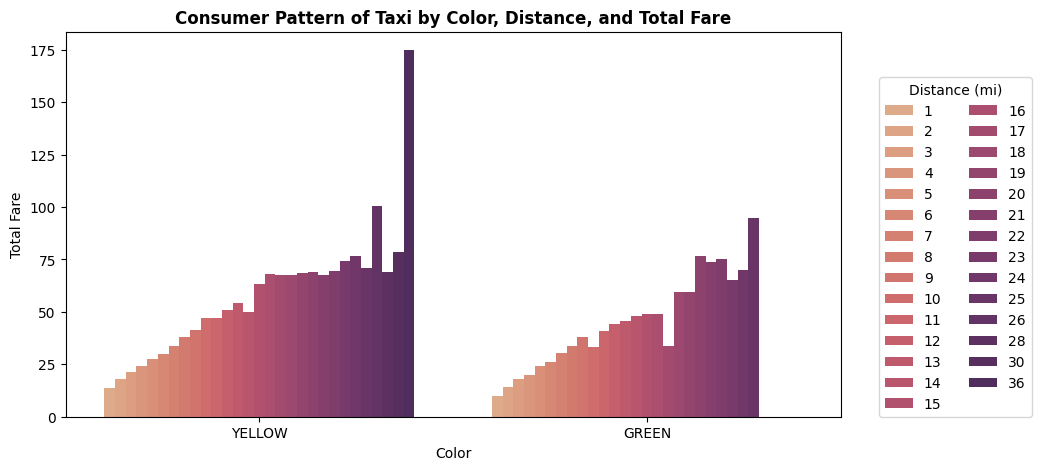

In [6]:
#Presenting data as a sns barplot.
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = df2, x = 'color', y = 'total', hue = 'distance (mi)', errorbar = None, palette = 'flare')
plt.legend( title = 'Distance (mi)', loc =(1.05, 0), fontsize = 10, ncols = 2)
plt.ylabel('Total Fare')
plt.xlabel('Color')
plt.title('Consumer Pattern of Taxi by Color, Distance, and Total Fare', weight = 'bold')
plt.show()

In [7]:
#dfc2 = clone of df
dfc2 = df
dfc2.groupby(['dropoff_borough', 'payment']).mean()[['passengers']]

<ipython-input-7-2a84376aadf1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfc2.groupby(['dropoff_borough', 'payment']).mean()[['passengers']]


passengers
dropoff_borough payment                
Bronx           cash           1.466667
                credit card    1.172840
Brooklyn        cash           1.314961
                credit card    1.447368
Manhattan       cash           1.608454
                credit card    1.563815
Queens          cash           1.603448
                credit card    1.533835
Staten Island   credit card    1.000000

In [8]:
#Cropping columns from DataFrame(raw data)
df3 = df[['payment', 'dropoff_borough', 'passengers']]

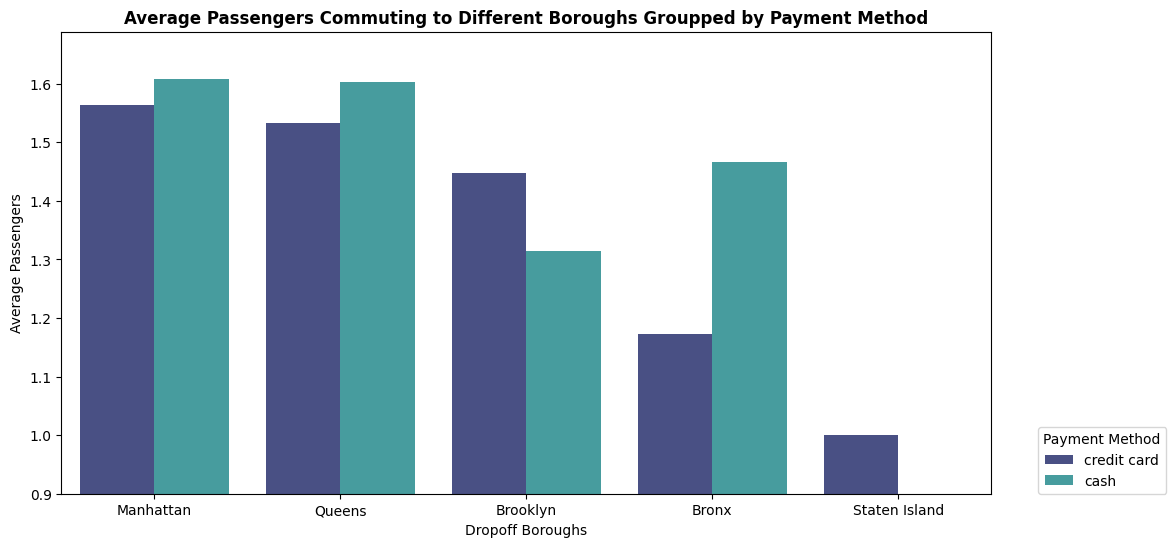

In [9]:
#Presenting data as a sns barplot.
plt.figure(figsize=(12, 6))
sns.barplot(data = df3, x = 'dropoff_borough', y = 'passengers', hue = 'payment', errorbar = None, palette = 'mako')
plt.ylabel('Average Passengers')
plt.xlabel('Dropoff Boroughs')
plt.legend( title = 'Payment Method', loc =(1.05, 0), fontsize = 10)
plt.title('Average Passengers Commuting to Different Boroughs Groupped by Payment Method', weight = 'bold')
plt.ylim(0.9)
plt.show()

In [ ]:
#df4 is a clone of df
df4 = df
#Converting the type of 'pickup' (pickup date and time) and cropping out on;y the date(s).
df4['pickup'] = df4['pickup'].astype('str').str.split('-').str[2].str[:2].astype('int')
#Rearranging the dates in ascending order by axis = 0 (by row)
df4.sort_values('pickup', axis = 0)

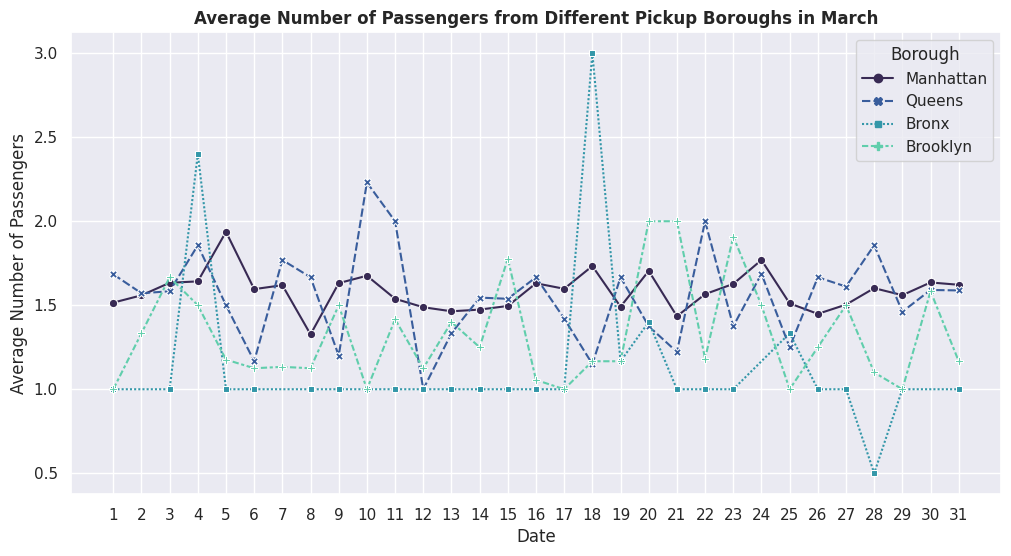

In [11]:
#Presenting data as a sns lineplot.
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data = df4, x = 'pickup', y = 'passengers', hue = 'pickup_borough', errorbar = None, style = 'pickup_borough', markers=True, dashes=True, palette='mako')
#Using the unique() to find different pickup dates and numpy to sort the array of dates, use .max() to find the maximum value
dates = df4['pickup'].unique()
max = np.sort(dates).max() 
min = np.sort(dates).min() 
#Editing the x-axis values 
x_labels = []
for i in range(min, max + 1):
  x_labels.append(i)
plt.xticks(x_labels)
#Y-axis 
plt.ylabel('Average Number of Passengers')
#X-axis
plt.xlabel('Date')
#Title 
plt.title('Average Number of Passengers from Different Pickup Boroughs in March', weight = 'bold')
#Legend
plt.legend(title = 'Borough')
plt.show()